In [29]:
import sys
sys.path.append('src/utils')

In [30]:
import preprocessing as prep
import glicko as glk
import elo as elo
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = prep.load_data()
df = prep.get_target(df)

Successfully concatenated 57 files.
Combined DataFrame shape: (194996, 49)
  tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0  1968-2029       Dublin   Grass       32.0             A      19680708   
1  1968-2029       Dublin   Grass       32.0             A      19680708   
2  1968-2029       Dublin   Grass       32.0             A      19680708   
3  1968-2029       Dublin   Grass       32.0             A      19680708   
4  1968-2029       Dublin   Grass       32.0             A      19680708   

   match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
0        270     112411          NaN          NaN  ...     NaN      NaN   
1        271     126914          NaN          NaN  ...     NaN      NaN   
2        272     209523          NaN          NaN  ...     NaN      NaN   
3        273     100084          NaN          NaN  ...     NaN      NaN   
4        274     100132          NaN          NaN  ...     NaN      NaN   

   l_2ndWon l_SvG

In [32]:
df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')

df = df[df['tourney_date'].dt.year >= 2000].reset_index(drop=True)

In [33]:
df = elo.calculate_general_elo(df)
df_elo = df[['tourney_date', 'surface', 'player_A_id', 'player_A_name', 'player_B_id', 'player_B_name', 'A_Elo_Overall', 'B_Elo_Overall', 'A_Elo_Surface', 'B_Elo_Surface']]

In [34]:
df_elo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74906 entries, 0 to 74905
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tourney_date   74906 non-null  datetime64[ns]
 1   surface        74853 non-null  object        
 2   player_A_id    74906 non-null  int64         
 3   player_A_name  74906 non-null  object        
 4   player_B_id    74906 non-null  int64         
 5   player_B_name  74906 non-null  object        
 6   A_Elo_Overall  74906 non-null  float64       
 7   B_Elo_Overall  74906 non-null  float64       
 8   A_Elo_Surface  74906 non-null  float64       
 9   B_Elo_Surface  74906 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 5.7+ MB


In [35]:
df_elo

,tourney_date,surface,player_A_id,player_A_name,player_B_id,player_B_name,A_Elo_Overall,B_Elo_Overall,A_Elo_Surface,B_Elo_Surface
0,2000-01-03,Hard,103096,Arnaud Clement,102358,Thomas Enqvist,1500.000000,1500.000000,1500.000000,1500.000000
1,2000-01-03,Hard,103819,Roger Federer,102533,Jens Knippschild,1500.000000,1500.000000,1500.000000,1500.000000
2,2000-01-03,Hard,101885,Wayne Arthurs,102998,Jan Michael Gambill,1500.000000,1500.000000,1500.000000,1500.000000
3,2000-01-03,Hard,103206,Sebastien Grosjean,102776,Andrew Ilie,1500.000000,1500.000000,1500.000000,1500.000000
4,2000-01-03,Hard,102401,Scott Draper,102796,Magnus Norman,1500.000000,1500.000000,1500.000000,1500.000000
...,...,...,...,...,...,...,...,...,...,...
74901,2024-12-18,Hard,209414,Luca Van Assche,210506,Alex Michelsen,1506.379929,1663.257299,1471.973443,1568.827960
74902,2024-12-18,Hard,210506,Alex Michelsen,210460,Nishesh Basavareddy,1668.933451,1500.000000,1572.469130,1500.000000
74903,2024-12-18,Hard,209992,Juncheng Shang,209414,Luca Van Assche,1650.073751,1499.826973,1534.507588,1468.332273
74904,2024-12-18,Hard,210460,Nishesh Basavareddy,209992,Juncheng Shang,1491.219500,1634.311290,1492.056097,1528.566600


In [36]:
import matplotlib as mpl

plt.style.use("dark_background")
mpl.rcParams.update({
    "axes.facecolor": "#111111",
    "figure.facecolor": "#111111",
    "axes.edgecolor": "#CCCCCC",
    "axes.labelcolor": "#FFFFFF",
    "xtick.color": "#BBBBBB",
    "ytick.color": "#BBBBBB",
    "grid.color": "#FFFFFF",
    "text.color": "#FFFFFF",
    "legend.edgecolor": "#333333",
})

# --- Vibrant color palette ---
colors = plt.cm.tab10.colors + plt.cm.Set2.colors + plt.cm.Set3.colors

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

_BASE_COLORS = list(plt.cm.tab10.colors) + list(plt.cm.Set2.colors) + list(plt.cm.Dark2.colors)
_PLAYER_COLOR_MAP = {}

def _get_player_color(name: str):
    if name not in _PLAYER_COLOR_MAP:
        _PLAYER_COLOR_MAP[name] = _BASE_COLORS[len(_PLAYER_COLOR_MAP) % len(_BASE_COLORS)]
    return _PLAYER_COLOR_MAP[name]

def plot_players_elo(
    df_elo: pd.DataFrame,
    K: int = 6,
    figsize=(10, 6),
    agg: str = "last",
    title: str = "Elo Evolution of Top Players",
    surface: str | None = None,
    min_matches: int = 30,
):
    plt.style.use("dark_background")
    mpl.rcParams.update({
        "axes.facecolor":"#111111","figure.facecolor":"#111111",
        "axes.edgecolor":"#CCCCCC","axes.labelcolor":"#FFFFFF",
        "xtick.color":"#BBBBBB","ytick.color":"#BBBBBB",
        "grid.color":"#FFFFFF","text.color":"#FFFFFF","legend.edgecolor":"#333333",
    })

    df = df_elo.copy()

    use_surface = surface is not None and {"A_Elo_Surface","B_Elo_Surface"}.issubset(df.columns)
    a_elo_col = "A_Elo_Surface" if use_surface else "A_Elo_Overall"
    b_elo_col = "B_Elo_Surface" if use_surface else "B_Elo_Overall"

    if surface is not None and "surface" in df.columns:
        df = df[df["surface"] == surface].copy()

    if not pd.api.types.is_datetime64_any_dtype(df["tourney_date"]):
        df["tourney_date"] = pd.to_datetime(df["tourney_date"], errors="coerce")
    df = df.dropna(subset=["tourney_date"])

    a = df[["tourney_date","player_A_id","player_A_name",a_elo_col]].rename(
        columns={"player_A_id":"player_id","player_A_name":"player_name",a_elo_col:"Elo"}
    )
    b = df[["tourney_date","player_B_id","player_B_name",b_elo_col]].rename(
        columns={"player_B_id":"player_id","player_B_name":"player_name",b_elo_col:"Elo"}
    )
    long = pd.concat([a,b], ignore_index=True)

    match_counts = (long.groupby(["player_id","player_name"])
                         .size()
                         .reset_index(name="matches"))

    if agg == "mean":
        per_day = long.groupby(["player_id","player_name","tourney_date"], as_index=False)["Elo"].mean()
    else:
        per_day = long.groupby(["player_id","player_name","tourney_date"], as_index=False)["Elo"].last()

    # >>> PEAK Elo ranking with min_matches <<<
    career_peak = (
        per_day.groupby(["player_id", "player_name"])["Elo"]
               .max()
               .reset_index(name="Elo_peak")
               .merge(match_counts, on=["player_id", "player_name"], how="left")
    )
    career_peak = career_peak[career_peak["matches"] >= min_matches] \
                           .sort_values("Elo_peak", ascending=False)

    if career_peak.empty:
        raise ValueError("No players meet the minimum match threshold after filtering.")

    top = career_peak.head(K)
    top_names = set(top["player_name"])
    best_name = top.iloc[0]["player_name"]

    top_data = per_day[per_day["player_name"].isin(top_names)].sort_values(["player_name","tourney_date"])

    fig, ax = plt.subplots(figsize=figsize)
    for name, g in top_data.groupby("player_name"):
        color = _get_player_color(name)
        alpha = 1.0 if name == best_name else 0.3
        lw = 2 if name == best_name else 1.5
        ax.plot(g["tourney_date"], g["Elo"], label=name, color=color, linewidth=lw, alpha=alpha)

    suffix = f" — {surface}" if surface else ""
    ylabel = "Elo Rating (Surface)" if use_surface else "Elo Rating (Overall)"
    ax.set_title(f"{title}{suffix}", fontsize=14, weight="bold")
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.legend(title="Player", loc="upper left", facecolor="#1C1C1C", framealpha=0.8)
    ax.grid(True, linestyle="--", alpha=0.4)
    fig.tight_layout()
    plt.show()
    return fig, ax


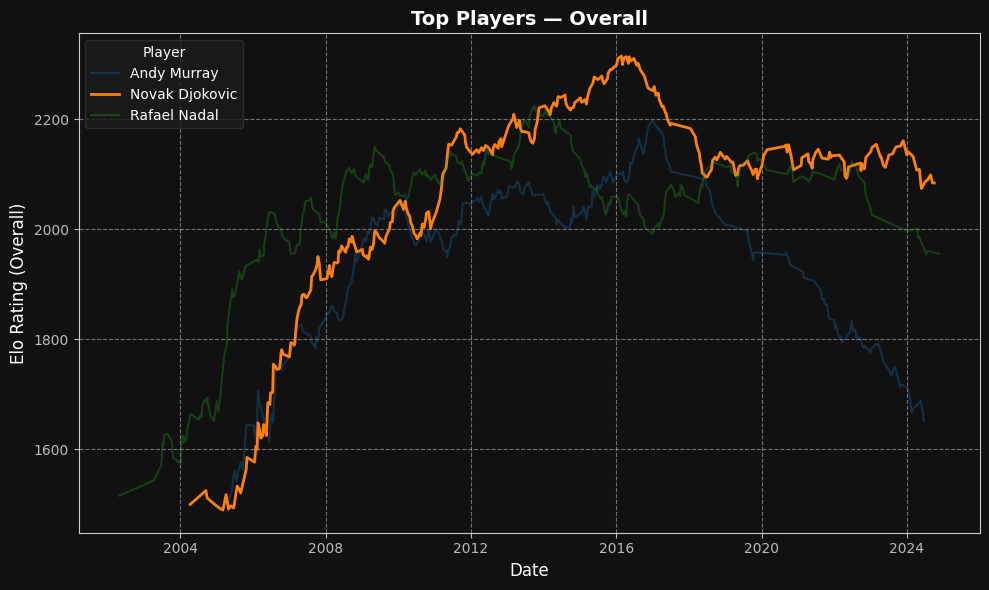

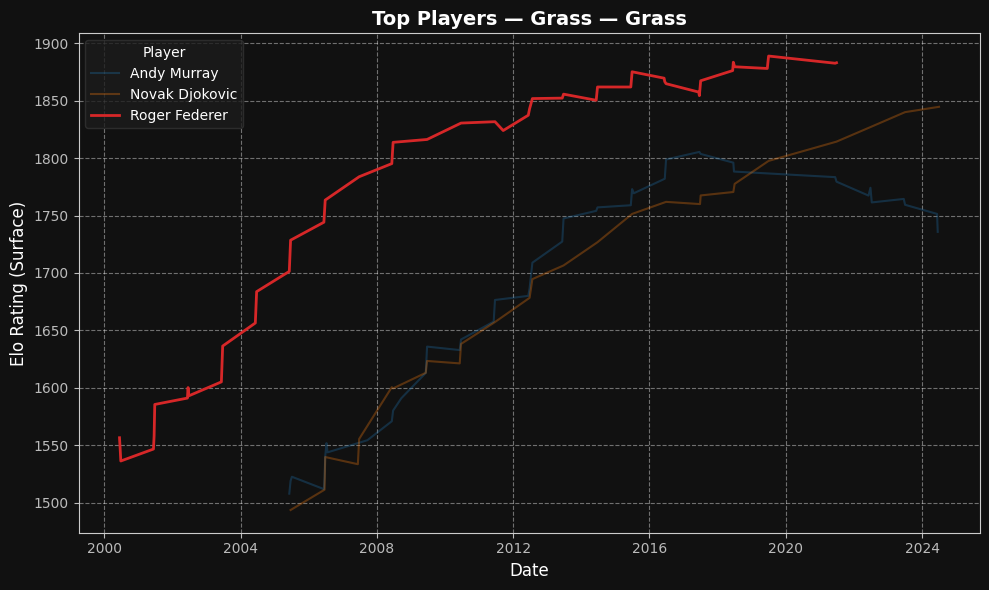

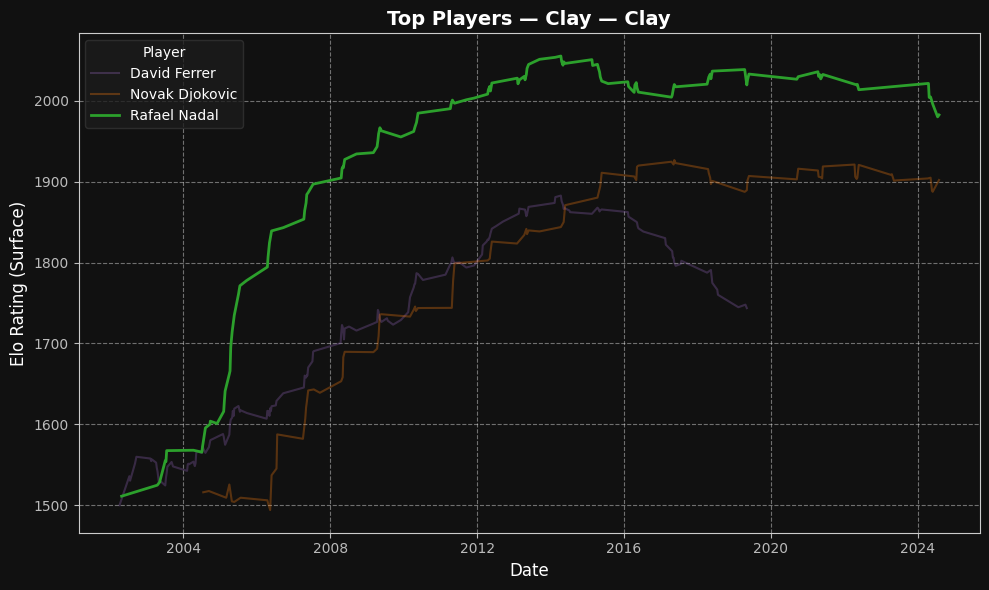

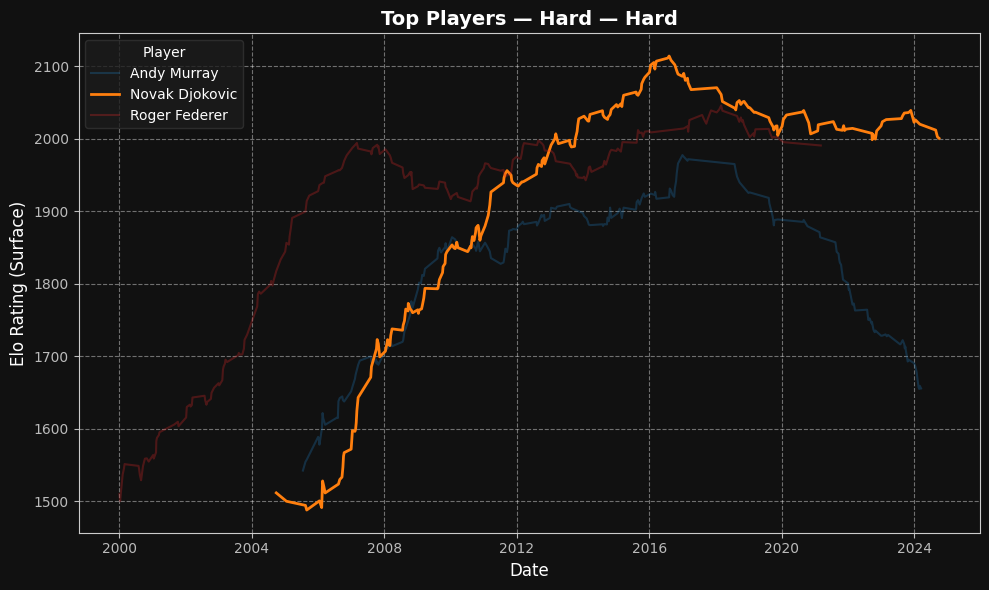

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Top Players — Hard — Hard'}, xlabel='Date', ylabel='Elo Rating (Surface)'>)

In [38]:
plot_players_elo(df_elo, K=3, figsize=(10,6), agg="last", title="Top Players — Overall", min_matches=50)
plot_players_elo(df_elo, K=3, figsize=(10,6), agg="last", title="Top Players — Grass", surface="Grass", min_matches=40)
plot_players_elo(df_elo, K=3, figsize=(10,6), agg="last", title="Top Players — Clay", surface="Clay", min_matches=40)
plot_players_elo(df_elo, K=3, figsize=(10,6), agg="last", title="Top Players — Hard", surface="Hard", min_matches=40)


In [ ]:
### Baseline model for comparison purposes
### Should be a model based on simple Elo ratings only, we can have general and surface ELO and a logistic regression to predict match outcomes.
### We then can incorporate more features and see how much they improve over this baseline.